#Data Acquisition 

In [69]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [70]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

rice-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rice-image-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [72]:
import os
from skimage import io
from skimage.transform import resize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [73]:
ls /content/Rice_Image_Dataset

Arborio/  Basmati/  Ipsala/  Jasmine/  Karacadag/  Rice_Citation_Request.txt


In [74]:
labels_list = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

In [75]:
features = []
labels = []

#TF Image

In [76]:
import tensorflow as tf

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
img_ds = tf.keras.utils.image_dataset_from_directory("Rice_Image_Dataset", image_size=(32,32), color_mode='grayscale')

Found 75000 files belonging to 5 classes.


In [79]:
batch = img_ds.as_numpy_iterator()

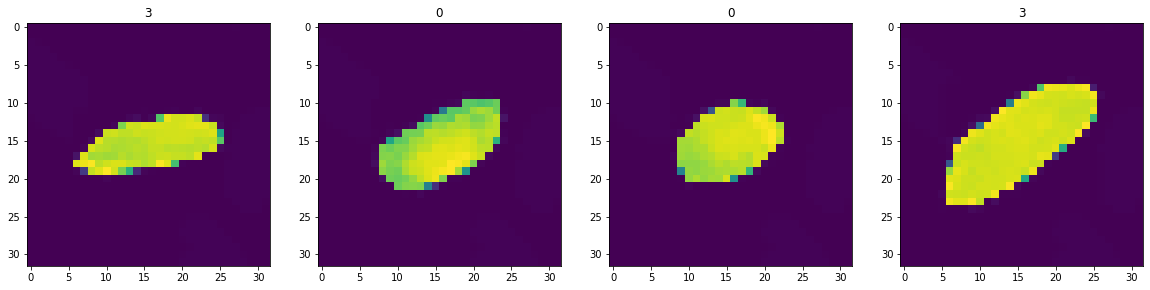

In [80]:
fix,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch.next()[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch.next()[1][idx])

#Image To DataFrame

In [81]:
features = []
labels = []

batch_iterator = img_ds.as_numpy_iterator()
img_batch,label_batch = batch_iterator.next()


while(True):
  try:
    for img,label in zip(img_batch,label_batch):
      features.append(img.flatten())
      labels.append(label)

    img_batch,label_batch = batch_iterator.next() 
  
  except StopIteration:
    break

In [82]:
features = pd.DataFrame(features)
labels = pd.DataFrame(labels)

#Feature Engineering

In [83]:
features.shape, labels.shape

((75000, 1024), (75000, 1))

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(features, labels, train_size=0.8, random_state=100)

In [85]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((60000, 1024), (15000, 1024), (60000, 1), (15000, 1))

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler1 = MinMaxScaler()

In [88]:
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler2 = StandardScaler()

In [91]:
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(n_components = None)

In [94]:
pca.fit_transform(X_train)

array([[-2.9340243e+00, -5.9480457e+00, -7.3680315e+00, ...,
         0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
       [-4.5703039e+00,  4.3411331e+00, -7.4806800e+00, ...,
        -9.5871337e-07, -4.2855669e-07,  7.0268257e-08],
       [-3.4773371e-01, -4.9617968e+00, -3.5224495e+00, ...,
         9.8815735e-06, -2.1464960e-07, -9.2853253e-07],
       ...,
       [ 8.3066168e+00, -5.7983203e+00, -5.0008745e+00, ...,
        -2.5823153e-08, -9.0255847e-09,  1.2717146e-09],
       [ 6.1617665e+00, -9.3427020e-01, -1.9598337e+00, ...,
        -4.7320849e-09,  3.3730783e-09, -2.7095122e-09],
       [-4.1196208e+00,  4.2633138e+00, -7.8635139e+00, ...,
         2.0460419e-08, -4.7125348e-09, -2.0192712e-09]], dtype=float32)

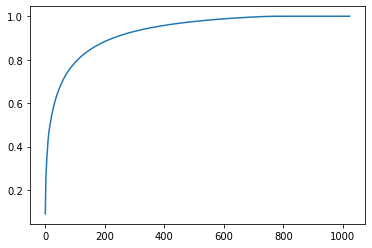

In [95]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [106]:
pca = PCA(n_components = 300)

X_train_pca = pca.fit_transform(X_train)
X_test_pca =  pca.transform(X_test)

In [107]:
X_train_pca.shape, X_test_pca.shape

((60000, 300), (15000, 300))

#Model

#KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [109]:
model_knn = KNeighborsClassifier()

In [110]:
model_knn.fit(X_train_pca, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [111]:
y_pred = model_knn.predict(X_test_pca)

In [112]:
print("%.4f" %(accuracy_score(y_pred, y_test)*100))

97.2067


In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
print(cross_val_score(model_knn, X_train_pca, np.ravel(y_train), cv=5))

[0.9695     0.967      0.96966667 0.9685     0.96816667]


In [115]:
for i in range(1,20):
  model_knn = KNeighborsClassifier(i)
  model_knn.fit(X_train_pca, np.ravel(y_train))
  y_pred = model_knn.predict(X_test_pca)
  print(i, " : ", end="")
  print("%.4f" %(accuracy_score(y_pred, y_test)*100))

1  : 96.6333
2  : 96.5667
3  : 97.1133
4  : 97.1133
5  : 97.2067
6  : 97.1467
7  : 97.1333
8  : 97.0600
9  : 97.1067
10  : 97.0400
11  : 97.0867
12  : 96.9867
13  : 97.0467
14  : 96.9467
15  : 96.9467
16  : 96.8267
17  : 96.8333
18  : 96.7000
19  : 96.6800


#Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train_pca, np.ravel(y_train))
y_pred = model_rf.predict(X_test_pca)

print("%.4f" %(accuracy_score(y_pred, y_test)*100))

97.3667


In [118]:
print(cross_val_score(model_rf, X_train_pca, np.ravel(y_train), cv=5))

[0.9715     0.96933333 0.97341667 0.96983333 0.9725    ]


#Pipeline

In [119]:
from sklearn.pipeline import Pipeline

In [120]:
pipe = Pipeline(
    [("MinMaxScaler", MinMaxScaler()), 
     ("StandardScaler", StandardScaler()),
     ("PCA", pca),
     ("Model_rf", model_rf)]
)

In [121]:
pipe.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('StandardScaler', StandardScaler()),
                ('PCA', PCA(n_components=300)),
                ('Model_rf', RandomForestClassifier())])

In [124]:
y_pred = pipe.predict(X_test)

In [125]:
print("%.4f" %(accuracy_score(y_pred, y_test)*100))

97.3533


In [126]:
print("%.4f" %(cross_val_score(pipe, X_train, np.ravel(y_train), cv=5, scoring='accuracy').mean()))

0.9709


#Save the model

In [127]:
import pickle

In [129]:
pickle.dump(pipe, open("pipeline.pkl", "wb"))